# Brownian dynamics simulator

In [1]:
import numpy as np
from matplotlib.pyplot import *
%matplotlib notebook
from scipy import *
from tqdm.notebook import *

# Rk4 integrator and functions definitions

In [2]:
#########################
#numerical integrator####

def integrate(F,t,y,tstop,dt):

    def runk4(F,t,y,dt):
        #retorna o incremento apra utilizar na resolucao
        K0=dt*F(t,y)
        K1=dt*F(t+dt/2.,y+K0/2.)
        K2=dt*F(t+dt/2.,y+K1/2.)
        K3=dt*F(t+dt,y+K2)
        return (K0 + 2.*K1 + 2.*K2 + K3)/6.0

    T=[]
    Y=[]
    T.append(t)
    Y.append(y)
    
    pbar = tqdm(total=(tstop-dt))
    while t<tstop:
        pbar.update(dt)
        dt=min(dt,tstop-t)
        y=y+runk4(F,t,y,dt)
        t=t+dt
        T.append(t)
        Y.append(y)

    return np.array(T),np.array(Y) 

##################################
#functions for simulating the dynamics

def harmonic_trap_potential(x,y,z,k,theta):
    kx=k[0]
    ky=k[1]
    kz=k[2]
    return 1/2 *((kx*(x*np.cos(theta)-y*np.sin(theta))**2)+
                     (ky*(x*np.sin(theta)+y*np.cos(theta))**2) + 1/2*kz*z**2)

def harmonic_trap(x,y,z,k,theta):

    
    kx=k[0]
    ky=k[1]
    kz=k[2]
    
    Fx = - (kx*(x*np.cos(theta)-y*np.sin(theta))*np.cos(theta)+(ky*(x*np.sin(theta)+y*np.cos(theta))*np.sin(theta)))
    Fy = - (-kx*(x*np.cos(theta)-y*np.sin(theta))*np.sin(theta)+(ky*(x*np.sin(theta)+y*np.cos(theta))*np.cos(theta)))
    Fz = -kz*z
    return Fx,Fy,Fz

def brownian_simulation(t_stop, dt, k, W, gamma, theta = 0, m=1,delta_x=0,delta_v=0):
    def F(t,y):

        Fi=np.zeros(6) #[x,vx,y,vy,z,vz]
        Fx,Fy,Fz = harmonic_trap(y[0],y[2],y[4],k,theta)
        
        Fi[0]=y[1]
        Fi[1]= -(gamma/m) * y[1] + Fx/m + W*(1-2*np.random.rand()) 
        
        Fi[2]=y[3]
        Fi[3]= -(gamma/m) * y[3] + Fy/m + W*(1-2*np.random.rand()) 
        
        Fi[4]=y[5]
        Fi[5]= -(gamma/m) * y[5] + Fz/m + W*(1-2*np.random.rand()) 
            
        return Fi

    
    def initial_condition():
        y=np.zeros(6)

        for i in range(0,6,2):

            y[i] = delta_x*(1-2*np.random.rand())
            y[i+1] = delta_v*(1-2*np.random.rand())

        return y
    
    r0=initial_condition()
    T,Y=integrate(F,0,r0,t_stop,dt)
    return T,Y


# Simulation of the Brownian Motion

In [8]:
#[kx,ky,kz] - parameters of the harmonic trap
k_0 = [1.,.3,.5]

#noise parameters
W_0 = 1
#drag parameter
gamma_0 = 0.1
#xy angle
theta = 0


#simulation time, dt step
t_stop = 10000
dt = 0.1

#simulation Y is a vector with [x,vx,y,vy,z,vz](t)
initial_pos = []
T,Y = brownian_simulation(t_stop,dt, k_0, W_0, gamma_0, theta = theta, delta_x=2)

time = T
x_data = Y[:,0]
y_data = Y[:,2] 
z_data = Y[:,4]

  0%|          | 0/9999.9 [00:00<?, ?it/s]

# Parameters of the trap

<IPython.core.display.Javascript object>


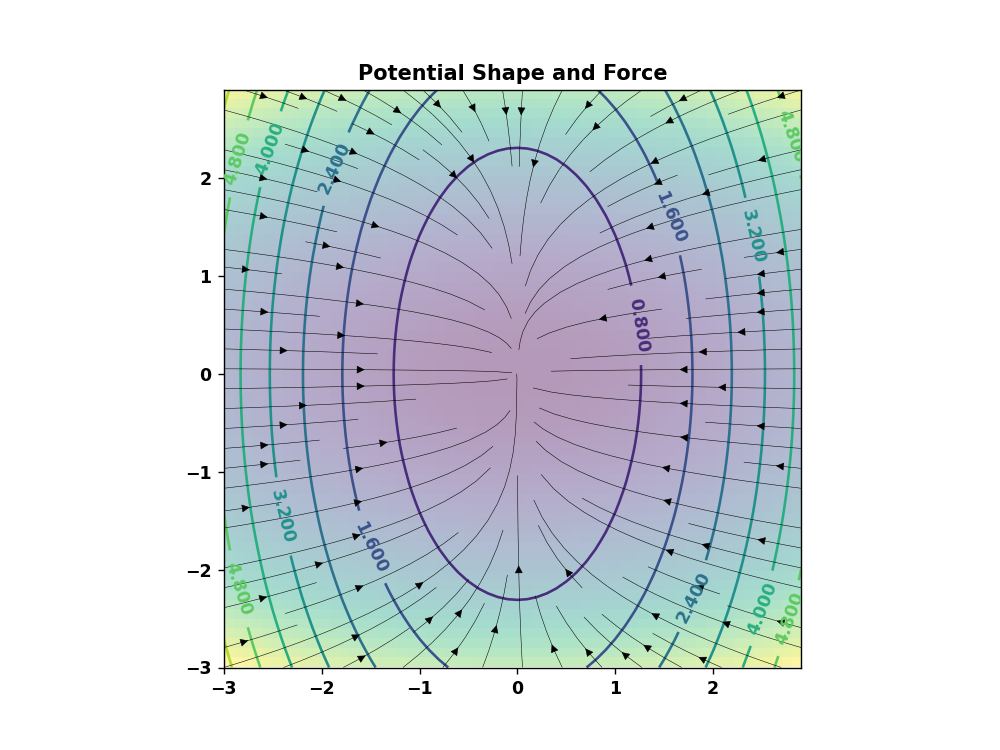

C:\Users\nunoa\Anaconda2\envs\py36\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: scipy.transpose is deprecated and will be removed in SciPy 2.0.0, use numpy.transpose instead
  if __name__ == '__main__':


Text(0.5, 1.0, 'Potential Shape and Force')

In [9]:
x = np.arange(-3,3,0.1) 
y = np.arange(-3,3,0.1)
xx,yy = np.meshgrid(x,y)

Fx,Fy,Vz = harmonic_trap(xx,yy,0,k_0,theta)
V = harmonic_trap_potential(xx,yy,0,k_0,theta)

subplots()
imshow(transpose(V),extent=[np.min(x),np.max(x),np.min(y),np.max(y)],origin='lower',alpha=0.4)
CS = contour(V,extent=[np.min(x),np.max(x),np.min(y),np.max(y)])
clabel(CS, CS.levels, inline=True, fontsize=10)
streamplot(xx,yy,Fx,Fy, density=[1, 1],color='k', linewidth=0.3)
title('Potential Shape and Force')

# Plot the Signals Obtained

# Plot a 2d histogram (xy) for the position probability

# Stiffness computation using standard deviation

In [19]:
#data retrieved from simulation
plot_step = 5 #a stride to reduce size of data
x_d = Y[:,0][::plot_step]
y_d = Y[:,2][::plot_step]
z_d = Y[:,4][::plot_step]

# Stiffness computation using Power Spectral Density

# Stiffness computation using Boltzmann Statistics

# Compare the results